---
# title: "혼공머 Chapter 05"
date: '2022-07-04 01:00'
---

# Chapter 05-1 결정 트리 (가장 중요함)
- 직관적이다.
- 윰세 웅이 머리 속에 있는게 결정 트리임.ㅎ
- 유일한 단점 : 과대적합이 일어나기 쉽다.

## wine 데이터 가져오기

In [24]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine.head)

<bound method NDFrame.head of       alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]>


## 데이터 프레임 확인

In [42]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- info() : 데이터 프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인.

In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- describe(): 열에 대한 간략한 통계 출력. 최소, 최대, 평균값 등을 볼 수 있다.

In [44]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 데이터 가공하기
- 알코올 도수, 당도, pH값 단위 표준화

In [25]:
data = wine [['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [45]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

## 훈련데이터 분리

In [26]:
# train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정합니다.
# 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 나눈다. test_size=0.2
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

## 표준화 처리

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀 모델 훈련 (lr)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- [결과 해석]
- 점수가 높지 않음. 생각보다 화이트 와인을 골라내기 어려움. 과소적합.
- 해결책: 규제 매개 변수 C의 값을 바꿔보자. / solver 매개변수에서 다른 알고리즘을 선택하자/ 다항 특성을 만들어 추가하자.

## 로지스틱 회귀가 학습한 계수와 절편

In [29]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정트리 모델 만들기 (dt)

In [30]:
from sklearn.tree import DecisionTreeClassifier

# criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
# dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


- [결과 해석]
- 훈련 정확도 : 0.99
- 테스트 정확도 : 0.85
- 과대적합이 일어났다.
- 차이가 생기는 이유 : 예를 들어 훈련때는 깔끔한 데이터(검,파,빨)로 훈련을 했으나, 테스트 시에는 섞인 데이터((검+파))가 들어오기 때문
- 해결책 : 색상이 아닌 도형으로 분류를 한다?
- 깊이가 너무 깊으면 섞여있는 데이터를 분류하기 힘들다. 때문에 당장 정확도는 약간 떨어질지 몰라도 깊이를 적당하게 조정한다. (max_depth= )
-max_depth= 을 지정해준 이후로는 훈련데이터 정확도는 떨어져도 과대,과소적합이 생기지 않았다.

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


- [결과 해석]
- max_depth= 3으로 지정하는 것이 과소,과대적합이 일어나지 않고 가장 바람직한 모델이 된다.

## 위에서 만든 결정트리 모델 객체를 plot_tree() 함수에 전달하여 시각화

0.996921300750433
0.8592307692307692


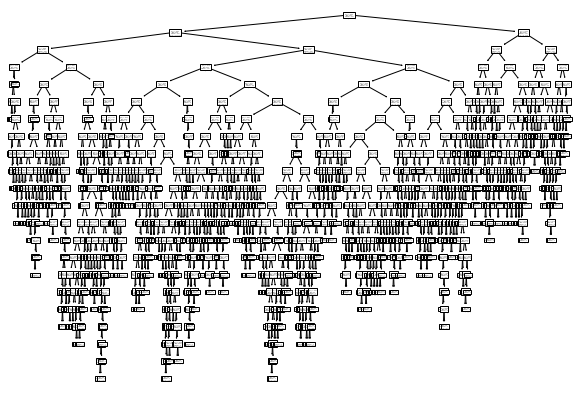

In [32]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth= None, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

0.8895516644217818
0.8630769230769231


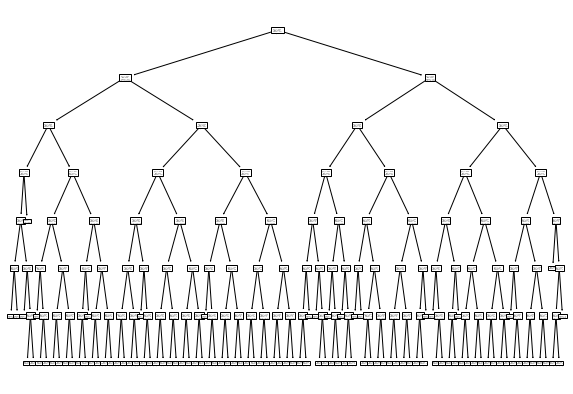

In [33]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth= 7, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

0.9003271117952665
0.8576923076923076


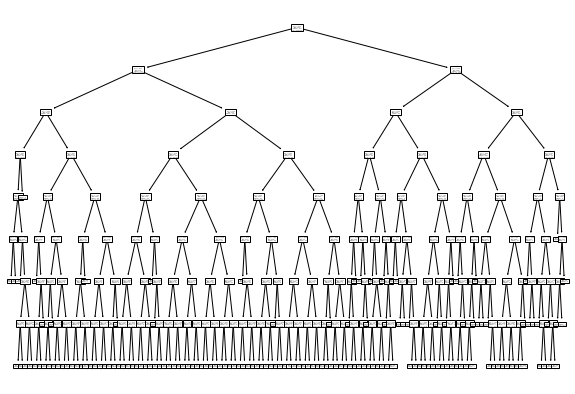

In [34]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth= 8, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- max_depth= 8이 되는 순간 과대적합이 생긴다.
- 고로 max_depth= 7 정도가 가장 적합하다.

## 노드란 무엇인가?
- 루트 노드, 노드, 리프노드(=말단노드)
- 루트 노드읽는 법
  + 테스트 조건
  + 불순도
  + 총 샘플 수 
  + 클래스별 샘플 수
  - filled= True 함수
    + 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다. 직관적.

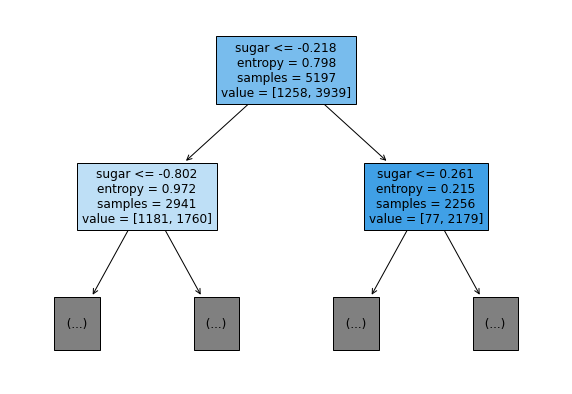

In [41]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1,
          filled= True,
          feature_names= ['alcohal', 'sugar', 'pH'])
plt.show()
# 루트 노드, 노드, 리프노드(=말단노드)

## 불순도 
  + 한 범주 안에서 서로 다른 데이터가 얼마나 섞여 있는지를 나타냄.
  + 흰색과 검은색이 각각 50개 섞여 있다.
    + 불순도 최대 : 0.5
  + 흰색과 검은색이 완전 100% 분리가 됨
    + 흰색 노드 불순도 최소 : 0
    + 검은색 노드 불순도 최소 : 0

  + 비율
  + 레드와인 5:5 화이트와인 -> 불순도가 가장 높을 때.gini 불순도의 수치 0.5

## 엔트로피(Entropy)
  + 불순도와 개념이 비슷하다.
  + 불확실한 정도를 의미함. 0~1 사이
  + 흰색과 검은색이 각각 50개 섞여 있다.
    + 엔트로피 최대 : 1
  + 흰색과 검은색이 완전 100% 분리가 됨
    + 흰색 노드 엔트로피 최소 : 0
    + 검은색 노드 엔트로피 최소 : 0

0.885703290359823
0.8669230769230769


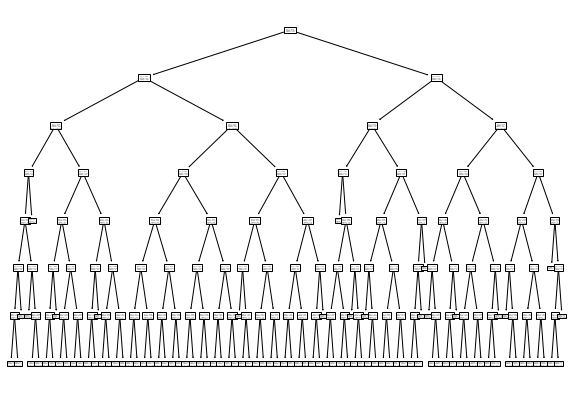

In [36]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# 엔트로피 사용
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

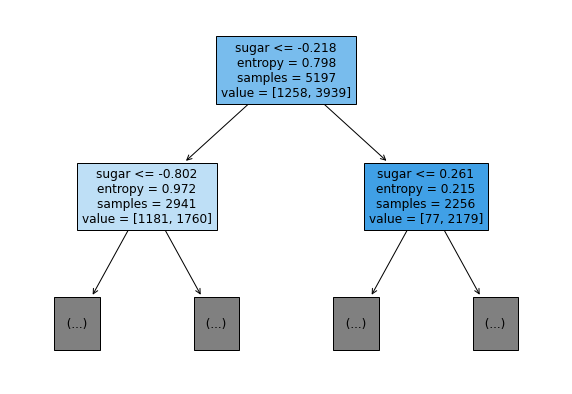

In [37]:
# 결과
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1,
          filled= True,
          feature_names= ['alcohal', 'sugar', 'pH'])
plt.show()

## 특성 중요도
- 어떤 특성이 결정 트리 모델에 영향을 주었는가?
- 어떤 기준, 특성이 가장 확실하게 분리를 시켜줄 수 있느냐? (여기에서는 sugar)
- 인과관계와는 상관이 없다.
- (회귀분석: 독립변수와 종속변수 사이의 인과관계를 따짐)

In [38]:
print(dt.feature_importances_)

[0.15247834 0.68293075 0.16459092]


## 현업에서의 적용
- 현업에서 DecisionTreeClassifier (1970년대)
- 랜덤포레스트. XGBoost 하이퍼파라미터 매우 많음

# Chapter 05-2 교차 검증과 그리드 서치
- 함부로 건들이지 말아라.
- 물론 다 시도해보면 퀄은 올라가겠지만 비효율적이다.

## 검증 세트
- 훈련세트와 테스트세트
- 훈련 : 교과서 공부하는 것 훈련세트, 모의평가
- 검증 : 강남대성 모의고사 문제지
-------파라미터는 훈련과 검증을 열심히 조지구..!-------
- 테스트 : 6모, 9모
- 실전 : 수능

In [46]:
# 데이터 가져오기
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine.head)

# 데이터 가공하기
data = wine [['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 데이터 분리
# 훈련 80%
# 테스트 20%
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

<bound method NDFrame.head of       alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]>


((5197, 3), (1300, 3), (5197,), (1300,))

In [47]:
# 훈련 80%
# 검증 20%
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state=42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

- 훈련데이터: train(X), sub_input, sub_target
- 검증데이터: val_input, val_target
- 테스트데이터: test_input, test_target

## 모형 만들기

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)
print("훈련 성과 : ", dt.score(sub_input, sub_target))
print("검증 성과 : ", dt.score(val_input, val_target))
print("마지막 최종 : ", dt.score(test_input, test_target))

훈련 성과 :  0.9971133028626413
검증 성과 :  0.864423076923077
마지막 최종 :  0.8569230769230769


- 어느정도 일치해야지 안정적이다고 한다.
- 훈련: 87%
- 검증: 86%
------보통 이정도에서만 끝남
- 최종: 55%
- 모형을 배포할지 말지 결정은 최종에 따라 결정된다.
- 훈련과 검증은 과대적합을 조정했으나, 최종 결과가 55%가 나왔기 때문에 모형 배포는 불가하다.

### 교차검증
- 데이터 셋을 반복 분할
- For loop
- 샘플링 편향적일 수 있다.
- 교차검증을 한다고 해서, 정확도가 무조건 올라간다?! (X)
- 모형을 안정적으로 만들어 준다, 편향성 예방
  + 과대적합 방지

In [54]:
# 책에 없는 내용
import numpy as np
from sklearn.model_selection import KFold

df = np.array([1,2,3,4,5,6,7,8,9,10])

# 데이터를 K 폴트로 나눈다.
folds = KFold(n_splits=5, shuffle= True)
for train_idx, valid_idx in folds.split(df):
  print(f'훈련데이터 : {df[train_idx]}, 검증 데이터 : {df[valid_idx]}')

훈련데이터 : [1 2 3 4 5 7 8 9], 검증 데이터 : [ 6 10]
훈련데이터 : [ 2  3  4  5  6  7  8 10], 검증 데이터 : [1 9]
훈련데이터 : [ 1  2  3  5  6  7  9 10], 검증 데이터 : [4 8]
훈련데이터 : [ 1  4  5  6  7  8  9 10], 검증 데이터 : [2 3]
훈련데이터 : [ 1  2  3  4  6  8  9 10], 검증 데이터 : [5 7]


## 교차 검증 함수

In [56]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt,train_input, train_target)
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.01930737, 0.01765442, 0.02578688, 0.022542  , 0.01724601]), 'score_time': array([0.00949001, 0.00124788, 0.00840759, 0.00133181, 0.00768995]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 :  0.855300214703487


## StratifiedKFold 사용

In [57]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.01292014, 0.01056361, 0.01049542, 0.01041055, 0.01058245]), 'score_time': array([0.00140882, 0.00116181, 0.00110102, 0.00124288, 0.00108576]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 :  0.855300214703487


### 10폴드 교차검증을 수행
- 가장 좋아짐.

In [59]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.03280711, 0.04228663, 0.02831173, 0.03076744, 0.02979231,
       0.01984262, 0.03593683, 0.03715229, 0.04245949, 0.03987837]), 'score_time': array([0.00103736, 0.00581765, 0.01219463, 0.00096822, 0.0007534 ,
       0.00889254, 0.00699735, 0.00105405, 0.00105524, 0.00118446]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
평균 :  0.8574181117533719


## 하이퍼파라미터 튜닝
- 그리드 서치
  + 사람이 수동적으로 입력
  + max_depth : [1,3,7]
- 랜덤 서치
  + 사람이 범위만 지정, 최적을 찾아내렴.
  + max_depth : 1~10 / by random 
- 베이지안 옵티마이제이션
- AutoML: 범위조차 알아서....
- 사람의 개입 없이 하이퍼파라미터 튜닝을 자동을 수행하는 기술을 AutoML이라고 함.
  + 예1) PyCaret , https://pycaret.gitbook.io/docs/
- 각 모델마다 적게는 1-2개에서 많게는 5-6개의 매개변수를 제공한다.
  + XGBoost 100개?
- 하이퍼파라미터와 동시에 교차검증을 수행.
  + 미친짓

교차검증 5 번
- Max Depth = 1, 3, 7
- Criterion = gini, entropy

- 교차검증 1번 돌 때, Max Depth 3번 적용
- 총 결과값 3 * 5 * 2나옴.
- 그러나 우리가 궁금한 것은 Best 1개만 알면 된다.


In [66]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [1, 3, 7],
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 7],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [70]:
print("best : ", gs.best_estimator_)
dt = gs.best_estimator_

# 1 결과 best :  DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)
# 2 'max_depth' : [1, 3, 7], 추가 이후
# 3 결과 best :  DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.0005,random_state=42)
# 등등 계속 업데이트해서 사용할 수는 있으나
# 첫 결과에서 0.0001가 나왔다가도 min_impurity_decrease 숫자를 0.0001로 픽스시켜서는 안된다.
# 왜냐면 서로 영향을 주기 때문에 다른 파라미터가 추가 되면 최적 결과가 바뀔 수 있다.

best :  DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.0005,
                       random_state=42)
